In [32]:
import networkx as nx
import numpy as np

def apply_ising_model_adjacency(G, temperature=1):
    # Get the adjacency matrix of the graph
    A = nx.to_numpy_array(G)

    # Initialize spin states for each node
    spins = np.random.choice([-1, 1], size=len(G))

    # Iterate over the edges and update spins based on Ising model dynamics
    for u, v in G.edges():
        energy_change = 2 * spins[u] * spins[v]
        probability = np.exp(-energy_change / temperature)
        if np.random.rand() < probability:
            spins[u] *= -1
            spins[v] *= -1

    # Update the adjacency matrix based on spin states
    for i in range(len(G)):
        for j in range(i + 1, len(G)):
            if G.has_edge(i, j):  # If edge exists in original graph
                A[i, j] = A[j, i] = 1 if spins[i] * spins[j] > 0 else 0  # Update adjacency matrix

    # Generate a new graph with the updated adjacency matrix
    G_synthetic = nx.from_numpy_array(A)

    return G_synthetic

# Generate a random graph
G_real = nx.fast_gnp_random_graph(n=100, p=0.1)

# Apply Ising model to modify the adjacency matrix of the graph
G_synthetic = apply_ising_model_adjacency(G_real)

# Print adjacency matrix of the original graph
print("Adjacency Matrix - Original Graph:")
print(nx.to_numpy_array(G_real))

# Print adjacency matrix of the synthetic graph
print("Adjacency Matrix - Synthetic Graph:")
print(nx.to_numpy_array(G_synthetic))


Adjacency Matrix - Original Graph:
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Adjacency Matrix - Synthetic Graph:
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


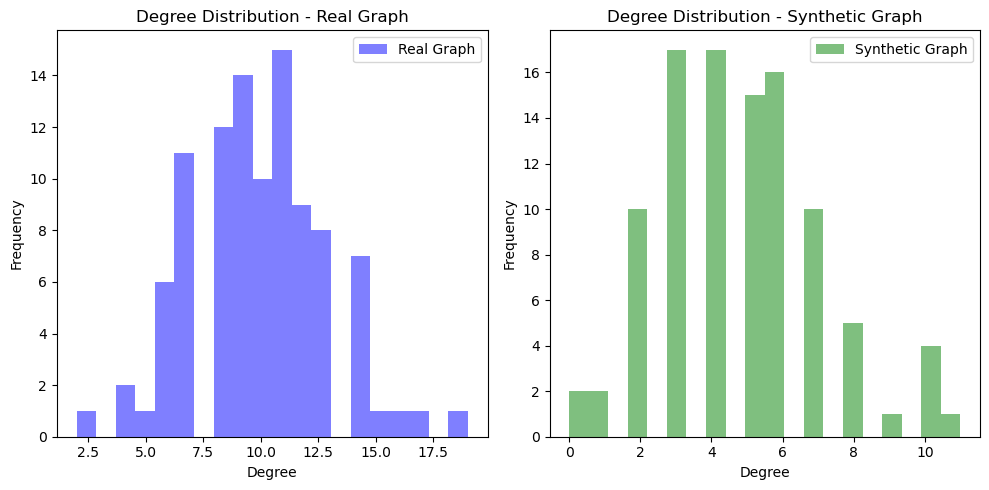

Average Clustering Coefficient - Real Graph: 0.09064594177752068
Average Clustering Coefficient - Synthetic Graph: 0.06303535353535353


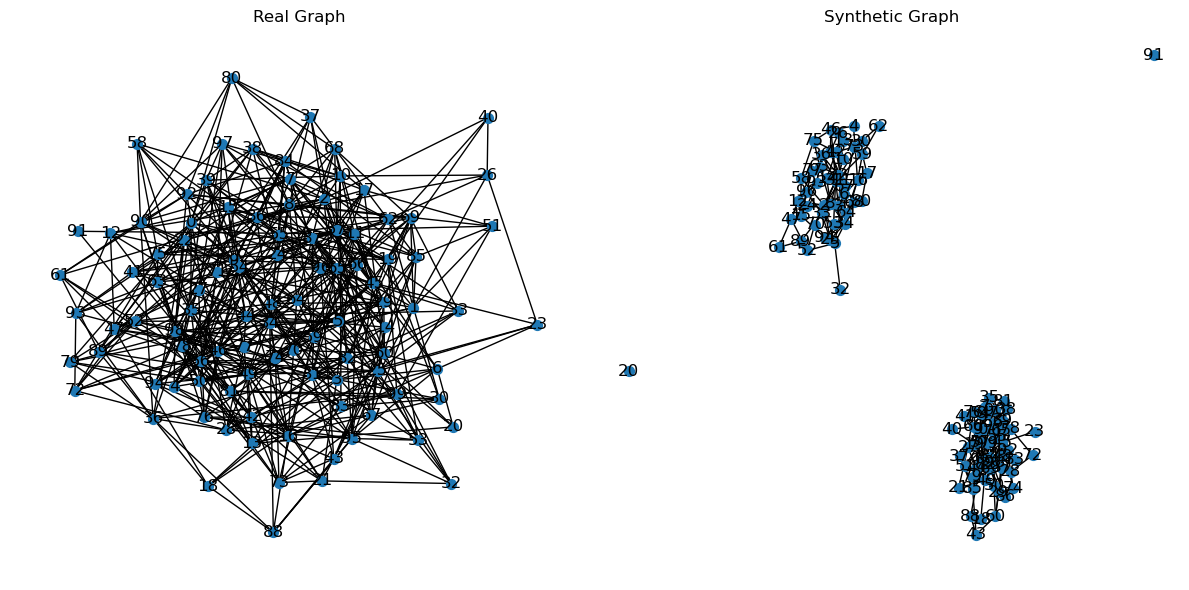

In [33]:
import matplotlib.pyplot as plt

# Compare Degree Distribution
degree_sequence_real = sorted([d for n, d in G_real.degree()], reverse=True)
degree_sequence_synthetic = sorted([d for n, d in G_synthetic.degree()], reverse=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(degree_sequence_real, bins=20, alpha=0.5, color='blue', label='Real Graph')
plt.title('Degree Distribution - Real Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(degree_sequence_synthetic, bins=20, alpha=0.5, color='green', label='Synthetic Graph')
plt.title('Degree Distribution - Synthetic Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Compare Clustering Coefficient
clustering_real = nx.average_clustering(G_real)
clustering_synthetic = nx.average_clustering(G_synthetic)

print("Average Clustering Coefficient - Real Graph:", clustering_real)
print("Average Clustering Coefficient - Synthetic Graph:", clustering_synthetic)

# Visual Comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(G_real, with_labels=True, node_size=50)
plt.title('Real Graph')

plt.subplot(1, 2, 2)
nx.draw(G_synthetic, with_labels=True, node_size=50)
plt.title('Synthetic Graph')

plt.tight_layout()
plt.show()


In [27]:
# Select representative nodes from the real graph
selected_nodes_real = select_representative_nodes(G_real)

# Extract subgraph from the real graph
subgraph_real = extract_subgraph(G_real, selected_nodes_real)

# Apply Ising model dynamics to the synthetic graph
G_synthetic_modified = apply_ising_model_adjacency(G_synthetic, subgraph_real)

# Evaluate similarity between modified synthetic graph and real subgraph
similarity_score = evaluate_similarity(subgraph_real, G_synthetic_modified)

# Adjust Ising model parameters or optimization steps if necessary
if similarity_score < threshold:
    refine_synthetic_graph()

# Iterate the process if needed


import networkx as nx
import numpy as np

def select_representative_nodes(G_real, num_nodes=35):
    # Randomly select a subset of nodes from the real graph
    return np.random.choice(G_real.nodes(), size=num_nodes, replace=False)

def extract_subgraph(G_real, selected_nodes):
    # Extract the induced subgraph from the real graph using the selected nodes
    return G_real.subgraph(selected_nodes)

def apply_ising_model_adjacency(G_synthetic, subgraph_real, temperature=1.0):
    # Get the adjacency matrix of the synthetic graph
    A_synthetic = nx.to_numpy_array(G_synthetic)

    # Get the adjacency matrix of the real subgraph
    A_real = nx.to_numpy_array(subgraph_real)

    # Initialize spin states for each node
    spins = np.random.choice([-1, 1], size=len(G_synthetic))

    # Iterate over the edges and update spins based on Ising model dynamics
    for u, v in G_synthetic.edges():
        energy_change = 2 * spins[u] * spins[v]
        probability = np.exp(-energy_change / temperature)
        if np.random.rand() < probability:
            spins[u] *= -1
            spins[v] *= -1

    # Update the adjacency matrix based on spin states and similarity to the real subgraph
    for i in range(len(G_synthetic)):
        for j in range(i + 1, len(G_synthetic)):
            if G_synthetic.has_edge(i, j):  # If edge exists in synthetic graph
                # If corresponding edge exists in real subgraph, adjust similarity
                if subgraph_real.has_edge(i, j):
                    A_synthetic[i, j] = A_synthetic[j, i] = A_real[i, j] * spins[i] * spins[j]
                else:
                    A_synthetic[i, j] = A_synthetic[j, i] = 0  # Set edge weight to 0
            else:
                # If no edge exists in synthetic graph, mimic real subgraph connectivity
                if subgraph_real.has_edge(i, j):
                    A_synthetic[i, j] = A_synthetic[j, i] = A_real[i, j] * spins[i] * spins[j]

    # Generate a new graph with the updated adjacency matrix
    G_synthetic_modified = nx.from_numpy_array(A_synthetic)

    return G_synthetic_modified

def evaluate_similarity(subgraph_real, G_synthetic_modified):
    # Compute some similarity metric between the modified synthetic graph and the real subgraph
    # For example, you can compute graph edit distance or structural similarity indices
    # Here, we'll simply compare the number of common edges between the two graphs
    common_edges = len(set(G_synthetic_modified.edges()).intersection(subgraph_real.edges()))
    total_edges = len(subgraph_real.edges())
    similarity_score = common_edges / total_edges
    return similarity_score

# Example usage:
# Generate a random graph (real graph)
G_real = nx.fast_gnp_random_graph(n=10000, p=0.01)

# Generate synthetic graph (initially)
G_synthetic = nx.fast_gnp_random_graph(n=35, p=0.1)

# Select representative nodes from the real graph
selected_nodes_real = select_representative_nodes(G_real)

# Extract subgraph from the real graph
subgraph_real = extract_subgraph(G_real, selected_nodes_real)

# Apply Ising model to modify the synthetic graph's adjacency matrix
G_synthetic_modified = apply_ising_model_adjacency(G_synthetic, subgraph_real)

# Evaluate similarity between modified synthetic graph and real subgraph
similarity_score = evaluate_similarity(subgraph_real, G_synthetic_modified)

print("Similarity Score:", similarity_score)


NameError: name 'select_representative_nodes' is not defined

# Give a constrains for the generated adj by random selected adj from that class in real graph.
